# Aula 6 - Exercícios de Preprocessamento sobre um DataSet

---

## Data Set Iris

In [43]:
# Start by importing the modules

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data = datasets.load_iris()

In [45]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
print(data.target_names)
data.keys()



['setosa' 'versicolor' 'virginica']


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

<img src="images/220px-Petal-sepal.jpg"/>

In [47]:
#Classes
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [48]:
dframe = pd.DataFrame(data.data, columns=data.feature_names)
dframe.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1. Será a criação de um modelo que permite identificar que planta estamos a falar um problema de classificação ou de regressão?
1. Que features quantitiativas temos?
1. Que features qualitativas temos?
 

## Alguns estatísticas sobre os dados que temos em mãos

In [49]:
alldata = np.column_stack((data.data,data.target))
allnames = np.append(data.feature_names,"Classe")
dframe = pd.DataFrame(alldata, columns=allnames)
dframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Classe
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [50]:
stat = dframe.groupby("Classe").agg(["mean","count", "std"])
stat

sepal length (cm)                 sepal width (cm)                  \
                    mean count       std             mean count       std   
Classe                                                                      
0.0                5.006    50  0.352490            3.428    50  0.379064   
1.0                5.936    50  0.516171            2.770    50  0.313798   
2.0                6.588    50  0.635880            2.974    50  0.322497   

       petal length (cm)                 petal width (cm)                  
                    mean count       std             mean count       std  
Classe                                                                     
0.0                1.462    50  0.173664            0.246    50  0.105386  
1.0                4.260    50  0.469911            1.326    50  0.197753  
2.0                5.552    50  0.551895            2.026    50  0.274650

In [51]:
X = stat.iloc[:,6]
X.sort_values(0, ascending=False)
X.loc[X==max(X)]

Classe
2.0    5.552
Name: (petal length (cm), mean), dtype: float64

In [52]:
X = dframe.groupby("petal width (cm)").agg("max")

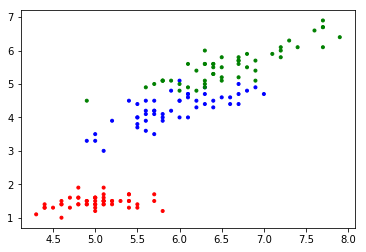

In [53]:
def colorize(D):
    res = []
    for d in D:
        if d==0:
            res.append("red")
        if d==1:
            res.append("blue")
        if d==2:
            res.append("green")            
    return res
            

plt.scatter(dframe.iloc[:,0], dframe.iloc[:,2], c=colorize(data.target), marker=".")
plt.show()

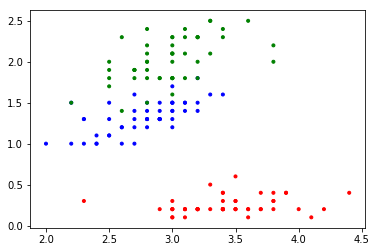

In [54]:
X = dframe.iloc[:,1]
Y = dframe.iloc[:,3]

plt.scatter(X, Y, c=colorize(data.target), marker=".")
plt.show()


## Análise dos dados - Normalização e Grandezas Estatísticas

Vamos medir a variância e a média de cada *feature* para normalizar os seus valores:

In [55]:
D = data.data
D.shape[0]

150

In [56]:
N = D.shape[0]
avg = D.mean(axis=0)
avg

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [57]:
sigma_ = np.sqrt((np.power((D-avg),2)).sum(axis=0)/N)
#ou 
sigma = D.std(axis=0)

print("average: \n--------\n",avg, "\n")
print("sigma: \n--------\n",sigma, "\n", sigma_)

average: 
--------
 [5.84333333 3.05733333 3.758      1.19933333] 

sigma: 
--------
 [0.82530129 0.43441097 1.75940407 0.75969263] 
 [0.82530129 0.43441097 1.75940407 0.75969263]


/Users/nbb/.local/share/virtualenvs/code-JDvErFti/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


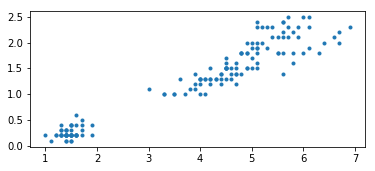

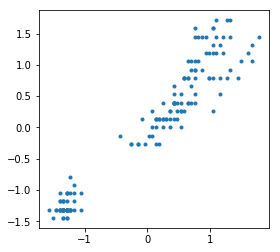

In [58]:
#Usando o dataFrame

#N = dframe.shape[0]
#med = dframe.agg("mean")
#print("Variances: \n----------\n\n",(np.power((dframe-med),2)).agg("sum")/N)

#normalizando:

D_norm = (D-avg)/sigma

#Feature 0 e 1
plt.plot(D[:,2], D[:,3], ".")
plt.axes().set_aspect('equal')
plt.show()

plt.figure
plt.plot(D_norm[:,2], D_norm[:,3], ".")
plt.axes().set_aspect('equal')
plt.show()


## Usando sklearn 

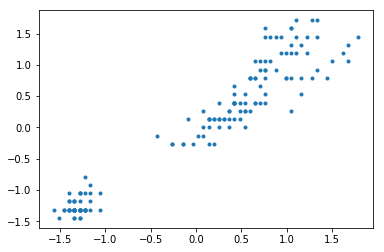

In [59]:
from sklearn import preprocessing

stdscaler = preprocessing.StandardScaler()
scaler = stdscaler.fit(D)
D_norm = scaler.transform(D)

plt.plot(D_norm[:,2], D_norm[:,3], ".")
plt.show()

## Sklearn Binarization

In [60]:
from sklearn import preprocessing

binarizer = preprocessing.Binarizer().fit(D)
print(binarizer)
binarizer.threshold=3.5
print(D[0:5,:])
binarizer.transform(D)[:5,:]

Binarizer(copy=True, threshold=0.0)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.]])

In [61]:
binarizer.transform(D[:,1].reshape(-1, 1))[:10,:]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

# Encoding categorical features (OneHotEncoder)

Considere-se o seguinte dataset com 4 registos:

In [62]:
A = np.array([["gato", "grande", "branco", 10], ["cão", "pequeno", "castanho", 4], ["gato", "medio", "castanho", 9], ["coelho", "pequeno", "branco", 3]])
A

array([['gato', 'grande', 'branco', '10'],
       ['cão', 'pequeno', 'castanho', '4'],
       ['gato', 'medio', 'castanho', '9'],
       ['coelho', 'pequeno', 'branco', '3']], dtype='<U8')

In [63]:
le = preprocessing.LabelEncoder()
#com o -1 limitamos os dados aos valores categóricos
A_ = np.copy(A[:,:-1])
for i in range(A_.shape[1]):
    A_[:,i] = le.fit_transform(A[:,i])
    
A_ = A_.astype(np.int)



number_of_vals =A_.max(axis=0)
print("Numero de Valores Distintos por Feature: ", number_of_vals+1)

Numero de Valores Distintos por Feature:  [3 3 2]


Em que cada coluna corresponde a uma feature com valores discretos em todas elas. 

> (os valores possiveis para cada feature são obtidos automaticamente da lista de resgistos disponíveis)

In [64]:
enc = preprocessing.OneHotEncoder()
enc.fit(A_)
print(A)
print("\n")
print(A_)
print("\n")
print(enc.transform(A_).toarray())

[['gato' 'grande' 'branco' '10']
 ['cão' 'pequeno' 'castanho' '4']
 ['gato' 'medio' 'castanho' '9']
 ['coelho' 'pequeno' 'branco' '3']]


[[2 0 0]
 [1 2 1]
 [2 1 1]
 [0 2 0]]


[[0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0.]]


/Users/nbb/.local/share/virtualenvs/code-JDvErFti/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# Feature Extraction from Dictionaries (json)

Este modo permite rapidamente obter dados tratáveis: valores reais (ou inteiros) + OneHotEncoding para features discretas.

In [65]:
from sklearn.feature_extraction import DictVectorizer

B = [
{"1animal":"gato", "2tamanho":"grande", "3cor":"branco", "4pontos":10}, 
{"1animal":"cão", "2tamanho":"pequeno", "3cor":"castanho", "4pontos":4}, 
{"1animal":"gato", "2tamanho":"medio", "3cor":"castanho", "4pontos":9}, 
{"1animal":"coelho", "2tamanho":"pequeno", "3cor":"branco", "4pontos":3}]


B

[{'1animal': 'gato', '2tamanho': 'grande', '3cor': 'branco', '4pontos': 10},
 {'1animal': 'cão', '2tamanho': 'pequeno', '3cor': 'castanho', '4pontos': 4},
 {'1animal': 'gato', '2tamanho': 'medio', '3cor': 'castanho', '4pontos': 9},
 {'1animal': 'coelho', '2tamanho': 'pequeno', '3cor': 'branco', '4pontos': 3}]

In [66]:
vec = DictVectorizer()
vec.fit_transform(B).toarray()

array([[ 0.,  0.,  1.,  1.,  0.,  0.,  1.,  0., 10.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  4.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  9.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  3.]])

# Como lidar com valores em falta

Primeiro vamos eliminar registos com features nao preenchidas. Considere-se o seguinte array:

In [67]:
A =np.random.uniform(0,4, size=(10,3))
for _ in range(10):
    A[np.random.randint(0,10),np.random.randint(0,3)]=np.nan
A

array([[0.15342704, 1.13005477,        nan],
       [       nan,        nan, 2.00650696],
       [3.56497059, 3.64394406, 2.6290623 ],
       [1.32034848,        nan, 3.42614226],
       [       nan,        nan, 3.36431681],
       [       nan, 3.9923934 , 0.41014777],
       [3.94054754, 3.5339654 ,        nan],
       [0.55303942, 1.42992679,        nan],
       [3.59927673, 0.88204324, 3.0558551 ],
       [       nan, 0.63076113, 3.39751791]])

In [74]:
#Drop NaNs usando Dataframes
dfA = pd.DataFrame(A)
dfA

,0,1,2
0,0.153427,1.130055,NaN
1,NaN,NaN,2.006507
2,3.564971,3.643944,2.629062
3,1.320348,NaN,3.426142
4,NaN,NaN,3.364317
5,NaN,3.992393,0.410148
6,3.940548,3.533965,NaN
7,0.553039,1.429927,NaN
8,3.599277,0.882043,3.055855
9,NaN,0.630761,3.397518


In [78]:
dfA.dropna(axis=0)

,0,1,2
2,3.564971,3.643944,2.629062
8,3.599277,0.882043,3.055855


In [71]:
#preenchendo NaNs com valores médios por feature usando Dataframes

dfA.fillna(dfA.mean(axis=0))
#preenchedo NaNs com valores médios somente na primeira feature

In [164]:
dfA.fillna(dfA.mean(axis=0)[0:1])
#dfA.loc[dfA[0]!= np.nan,:]

,0,1,2
0,0.332865,NaN,3.596499
1,0.004096,NaN,NaN
2,1.311571,1.348297,3.430109
3,1.311571,0.046978,1.297749
4,1.021217,3.492020,NaN
5,1.284583,0.794457,3.722027
6,1.207830,3.610778,NaN
7,3.174630,1.463878,1.472380
8,2.956434,NaN,1.725592
9,0.510913,3.655326,NaN


## Feature Transformation (sklearn ou Pandas)

In [168]:
#com pandas, usando apply
def my_func(x):
    return [x[0],x.name**2,x.name*x[1]]

In [170]:
dfA[:3]

,0,1,2
0,0.332865,NaN,3.596499
1,0.004096,NaN,NaN
2,NaN,1.348297,3.430109


In [169]:
dfA.apply(my_func, axis=1)

,0,1,2
0,0.332865,0.0,NaN
1,0.004096,1.0,NaN
2,NaN,4.0,2.696593
3,NaN,9.0,0.140935
4,1.021217,16.0,13.968082
5,1.284583,25.0,3.972286
6,1.207830,36.0,21.664669
7,3.174630,49.0,10.247146
8,2.956434,64.0,NaN
9,0.510913,81.0,32.897934


## Separação do DataSet

### Defining Training e Test sets

In [80]:
#Random Train/Test Selection

#aqui existem muitas outras funções
from sklearn import model_selection

frame = model_selection.train_test_split(data.data, data.target, test_size=0.20)
print("data")
print(data.data.shape)
print("train data shape:")
print(frame[0].shape)
print(frame[2].shape)
print("test data shape:")
print(frame[1].shape)
print(frame[3].shape)
print("ratio test/train")
print(frame[1].shape[0]/data.data.shape[0])

print("------")
print("initial data:")
print(data.data[:2,:])
print(data.target[:2])
print("initial train data:")
print(frame[0][:2,:])
print(frame[2][:2])
print("initial test data:")
print(frame[1][:2,:])
print(frame[3][:2])

# Make your own sampling process: 80% random values for training

data
(150, 4)
train data shape:
(120, 4)
(120,)
test data shape:
(30, 4)
(30,)
ratio test/train
0.2
------
initial data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
[0 0]
initial train data:
[[6.  2.7 5.1 1.6]
 [4.7 3.2 1.3 0.2]]
[1 0]
initial test data:
[[6.6 3.  4.4 1.4]
 [6.1 3.  4.6 1.4]]
[1 1]


In [100]:
S = np.arange(data.data.shape[0])
np.random.shuffle(S)
index_train = S[:int(data.data.shape[0]*0.8)]
index_test = S[int(data.data.shape[0]*0.8):]

print(index_test.shape[0]+ index_train.shape[0])
print("------")

frame = np.concatenate([data.data,data.target.reshape(-1,1)], axis=1)
frame_train = frame[index_train,:]
frame_test = frame[index_test,:]


print("initial train data:")
print(frame_train.shape)
print("------")
print("initial test data:")
print(frame_test.shape)

150
------
initial train data:
(120, 5)
------
initial test data:
(30, 5)
